In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
dataset=pd.read_csv('Churn_Modelling.csv')

In [3]:
dataset.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
dataset.shape

(10000, 14)

In [6]:
x=dataset.iloc[:,3:13]
y=dataset.iloc[:,13]

In [7]:
x.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10


In [8]:
y.head()

0    1
1    0
2    1
3    0
4    0
Name: Exited, dtype: int64

In [14]:
dataset.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [15]:
geo=pd.get_dummies(x['Geography'],drop_first=True)

In [16]:
gen=pd.get_dummies(x['Gender'],drop_first=True)

In [17]:
x=pd.concat([x,geo,gen],axis=1)

In [18]:
x=x.drop(['Geography','Gender'],axis=1)

In [21]:
x.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Germany,Spain,Male
0,619,42,2,0.00,1,1,1,101348.88,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,1,0


Training and Test Split


In [20]:
from sklearn.model_selection import train_test_split

In [22]:

X_train,X_test,Y_train,Y_test=train_test_split(x,y,test_size=0.20)

Feature Scaling


In [23]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

In [24]:
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

Sequential and Dense Model


In [26]:
import tensorflow.keras


In [28]:
!pip install keras

In [31]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout

In [33]:
classifier=Sequential()

In [36]:
classifier.add(Dense(units=10,kernel_initializer='he_uniform',activation='relu',input_dim=11))

In [37]:
classifier.add(Dense(units=10,kernel_initializer='he_uniform',activation='relu'))

In [39]:
classifier.add(Dense(units=1,kernel_initializer='he_uniform',activation='sigmoid'))

In [42]:
classifier.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [43]:
model=classifier.fit(X_train,Y_train,validation_split=0.33,batch_size=100,epochs=100)

Epoch 1/100
54/54 [==============================] - 2s 6ms/step - loss: 0.5264 - accuracy: 0.7777 - val_loss: 0.4828 - val_accuracy: 0.8107
Epoch 2/100
54/54 [==============================] - 0s 3ms/step - loss: 0.4804 - accuracy: 0.7950 - val_loss: 0.4610 - val_accuracy: 0.8148
Epoch 3/100
54/54 [==============================] - 0s 3ms/step - loss: 0.4631 - accuracy: 0.8009 - val_loss: 0.4470 - val_accuracy: 0.8141
Epoch 4/100
54/54 [==============================] - 0s 3ms/step - loss: 0.4661 - accuracy: 0.7918 - val_loss: 0.4366 - val_accuracy: 0.8114
Epoch 5/100
54/54 [==============================] - 0s 3ms/step - loss: 0.4630 - accuracy: 0.7888 - val_loss: 0.4291 - val_accuracy: 0.8122
Epoch 6/100
54/54 [==============================] - 0s 3ms/step - loss: 0.4455 - accuracy: 0.8006 - val_loss: 0.4238 - val_accuracy: 0.8107
Epoch 7/100
54/54 [==============================] - 0s 3ms/step - loss: 0.4530 - accuracy: 0.7907 - val_loss: 0.4198 - val_accuracy: 0.8141
Epoch 8/100
5

In [44]:
model.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

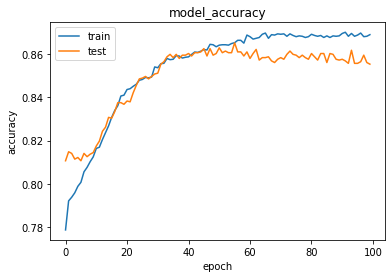

In [48]:
plt.plot(model.history['accuracy'])
plt.plot(model.history['val_accuracy'])
plt.title('model_accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'],loc='upper left')
plt.show()

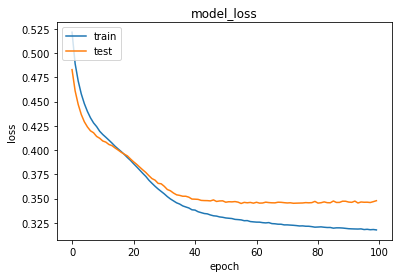

In [49]:
plt.plot(model.history['loss'])
plt.plot(model.history['val_loss'])
plt.title('model_loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'],loc='upper left')
plt.show()

In [51]:
y_pred=classifier.predict(X_test)


In [52]:
y_pred

array([[0.05821121],
       [0.63359964],
       [0.24915375],
       ...,
       [0.9374591 ],
       [0.35395053],
       [0.87589467]], dtype=float32)

In [62]:
y_pred = (y_pred > 0.5)

In [64]:
y_pred

array([[False],
       [ True],
       [False],
       ...,
       [ True],
       [False],
       [ True]])

In [59]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [65]:
cm=confusion_matrix(Y_test,y_pred)

In [66]:
cm

array([[1469,   92],
       [ 218,  221]])

In [67]:
score=accuracy_score(Y_test,y_pred)

In [68]:
score

0.845